In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
import ast

# Análise Inicial

In [73]:
df = pd.read_csv('datasets/sdtcentury2.csv')
df

,date,title,comments,id,english_title,release_date,vote_average,cast
0,2023-01-16,Shrek Terceiro,NaN,810.0,Shrek the Third,2007-05-17,6.286,['Mike Myers']
1,2023-03-10,A Bússola de Ouro,NaN,2268.0,The Golden Compass,2007-12-04,6.041,['Nicole Kidman']
2,2023-02-21,Até que a Sorte nos Separe,"exceto para São Paulo, Bahia e Minas Gerais",154441.0,Till Luck Do Us Part,2012-10-05,6.400,['Leandro Hassum']
3,2023-01-18,Os Parças 2,NaN,623780.0,Os Parças 2,2019-11-14,7.100,['Tom Cavalcante']
4,2023-01-31,Duelo de Cordas,também conhecido como High Strung: Ao Ritmo do...,382399.0,High Strung,2016-04-08,7.058,['Keenan Kampa']
...,...,...,...,...,...,...,...,...
8516,1976-04-07,Sonhos Dourados,NaN,31206.0,The Jolson Story,1946-10-10,6.700,['Larry Parks']
8517,1974-09-19,Brotinho Indocíl,NaN,64382.0,The Reluctant Debutante,1958-08-14,6.900,['Rex Harrison']
8518,1975-06-04,As Mil e uma Noites Árabes,1959,44871.0,1001 Arabian Nights,1959-12-01,5.500,['Jim Backus']
8519,1977-02-28,O Cisne Negro,1942,29882.0,The Black Swan,1942-12-04,6.435,['Tyrone Power']


In [74]:
df.dropna(subset=['title'], inplace=True)
df.dropna(subset=['english_title'], inplace=True)
df

,date,title,comments,id,english_title,release_date,vote_average,cast
0,2023-01-16,Shrek Terceiro,NaN,810.0,Shrek the Third,2007-05-17,6.286,['Mike Myers']
1,2023-03-10,A Bússola de Ouro,NaN,2268.0,The Golden Compass,2007-12-04,6.041,['Nicole Kidman']
2,2023-02-21,Até que a Sorte nos Separe,"exceto para São Paulo, Bahia e Minas Gerais",154441.0,Till Luck Do Us Part,2012-10-05,6.400,['Leandro Hassum']
3,2023-01-18,Os Parças 2,NaN,623780.0,Os Parças 2,2019-11-14,7.100,['Tom Cavalcante']
4,2023-01-31,Duelo de Cordas,também conhecido como High Strung: Ao Ritmo do...,382399.0,High Strung,2016-04-08,7.058,['Keenan Kampa']
...,...,...,...,...,...,...,...,...
8516,1976-04-07,Sonhos Dourados,NaN,31206.0,The Jolson Story,1946-10-10,6.700,['Larry Parks']
8517,1974-09-19,Brotinho Indocíl,NaN,64382.0,The Reluctant Debutante,1958-08-14,6.900,['Rex Harrison']
8518,1975-06-04,As Mil e uma Noites Árabes,1959,44871.0,1001 Arabian Nights,1959-12-01,5.500,['Jim Backus']
8519,1977-02-28,O Cisne Negro,1942,29882.0,The Black Swan,1942-12-04,6.435,['Tyrone Power']


In [75]:
df['release_year'] = df['release_date'].str[:4].astype(float)
df['year'] = df['date'].str[:4].astype(float)

df['diff'] = df['year'] - df['release_year']

In [76]:
rows_to_delete = df.loc[df['diff'] < 0]
df.drop(rows_to_delete.index, inplace=True)

In [77]:
df.dropna(subset=['release_date'], inplace = True)
df

,date,title,comments,id,english_title,release_date,vote_average,cast,release_year,year,diff
0,2023-01-16,Shrek Terceiro,NaN,810.0,Shrek the Third,2007-05-17,6.286,['Mike Myers'],2007.0,2023.0,16.0
1,2023-03-10,A Bússola de Ouro,NaN,2268.0,The Golden Compass,2007-12-04,6.041,['Nicole Kidman'],2007.0,2023.0,16.0
2,2023-02-21,Até que a Sorte nos Separe,"exceto para São Paulo, Bahia e Minas Gerais",154441.0,Till Luck Do Us Part,2012-10-05,6.400,['Leandro Hassum'],2012.0,2023.0,11.0
3,2023-01-18,Os Parças 2,NaN,623780.0,Os Parças 2,2019-11-14,7.100,['Tom Cavalcante'],2019.0,2023.0,4.0
4,2023-01-31,Duelo de Cordas,também conhecido como High Strung: Ao Ritmo do...,382399.0,High Strung,2016-04-08,7.058,['Keenan Kampa'],2016.0,2023.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
8514,1979-12-26,Keefer,SP,952431.0,Keefer,1978-03-16,0.000,['William Conrad'],1978.0,1979.0,1.0
8516,1976-04-07,Sonhos Dourados,NaN,31206.0,The Jolson Story,1946-10-10,6.700,['Larry Parks'],1946.0,1976.0,30.0
8517,1974-09-19,Brotinho Indocíl,NaN,64382.0,The Reluctant Debutante,1958-08-14,6.900,['Rex Harrison'],1958.0,1974.0,16.0
8518,1975-06-04,As Mil e uma Noites Árabes,1959,44871.0,1001 Arabian Nights,1959-12-01,5.500,['Jim Backus'],1959.0,1975.0,16.0


In [78]:
df.head(3)

,date,title,comments,id,english_title,release_date,vote_average,cast,release_year,year,diff
0,2023-01-16,Shrek Terceiro,NaN,810.0,Shrek the Third,2007-05-17,6.286,['Mike Myers'],2007.0,2023.0,16.0
1,2023-03-10,A Bússola de Ouro,NaN,2268.0,The Golden Compass,2007-12-04,6.041,['Nicole Kidman'],2007.0,2023.0,16.0
2,2023-02-21,Até que a Sorte nos Separe,"exceto para São Paulo, Bahia e Minas Gerais",154441.0,Till Luck Do Us Part,2012-10-05,6.400,['Leandro Hassum'],2012.0,2023.0,11.0


In [79]:
df.describe()

,id,vote_average,release_year,year,diff
count,7.543000e+03,7543.000000,7543.000000,7543.000000,7543.000000
mean,7.816749e+04,5.995143,1993.197004,2004.762561,11.565557
std,1.420445e+05,1.282490,16.546533,11.430046,9.640552
min,1.100000e+01,0.000000,1919.000000,1974.000000,0.000000
25%,1.019600e+04,5.591000,1986.000000,1995.000000,6.000000
50%,2.129100e+04,6.200000,1995.000000,2006.000000,9.000000
75%,6.540200e+04,6.692000,2006.000000,2015.000000,14.000000
max,1.105562e+06,10.000000,2022.000000,2023.000000,85.000000


In [80]:
df.dropna(subset=['cast'], inplace=True) 
df['cast'] = df['cast'].apply(ast.literal_eval)

In [81]:
lista_final = sum(df['cast'], [])
# print(type(lista_final), lista_final)


Counter(lista_final).most_common(10)

[('Renato Aragão', 135),
 ('Adam Sandler', 88),
 ('Jackie Chan', 76),
 ('Eddie Murphy', 73),
 ('Whoopi Goldberg', 67),
 ('Tom Hanks', 61),
 ('Martin Lawrence', 48),
 ('Arnold Schwarzenegger', 48),
 ('Michael J. Fox', 48),
 ('Will Smith', 45)]

### Utilizando os 5 principais atores nos créditos, o top 10 de atores mais comuns na sessão da tarde é:

- Renato Aragão, 135
- Dedé Santana, 123
- Eddie Murphy, 122
- Whoopi Goldberg, 103
- Mussum, 98
- Adam Sandler, 88
- Jackie Chan, 85
- Danny DeVito, 77
- Zacarias, 76
- Anne Hathaway, 74

### Utilizando todos os disponíveis, o top 10 é:

[('Frank Welker', 223),
 ('Renato Aragão', 135),
 ('Dedé Santana', 123),
 ('Eddie Murphy', 122),
 ('Whoopi Goldberg', 118),
 ('Rob Schneider', 109),
 ('Adam Sandler', 104),
 ('Danny DeVito', 102),
 ('Mussum', 98),
 ('Phil Proctor', 89)]

 ### Utilizando apenas o primeiro na ordem dos créditos:

 [('Renato Aragão', 135),
 ('Adam Sandler', 88),
 ('Jackie Chan', 76),
 ('Eddie Murphy', 73),
 ('Whoopi Goldberg', 67),
 ('Tom Hanks', 61),
 ('Martin Lawrence', 48),
 ('Arnold Schwarzenegger', 48),
 ('Michael J. Fox', 48),
 ('Will Smith', 45)]

In [82]:
Counter(df['release_year']).most_common(1) # Data de lançamento mais comum


[(2004.0, 287)]

In [10]:
df[df['diff'] == 0]['vote_average'].mean() # nota média de filmes lançamento

4.812069444444444

<Axes: xlabel='year', ylabel='diff'>

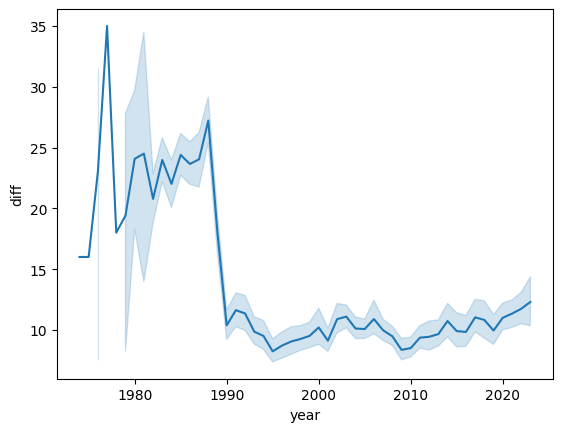

In [12]:
# Diferença lançamento-exibição por ano
sns.lineplot(data = df, y = 'diff', x = 'year')
plt.show()

            count      mean       std  min     25%    50%     75%    max
diff                                                                    
(0, 5]     1791.0  5.859300  1.319369  0.0  5.3420  6.049  6.5760  10.00
(5, 10]    2593.0  5.997374  1.082526  0.0  5.5320  6.104  6.6000  10.00
(10, 25]   2459.0  6.150479  1.140331  0.0  5.7245  6.266  6.7640  10.00
(25, 50]    546.0  6.128412  1.481451  0.0  5.9580  6.400  6.8455   8.36
(50, 100]    82.0  4.384829  3.287057  0.0  0.0000  6.500  6.7000   7.60


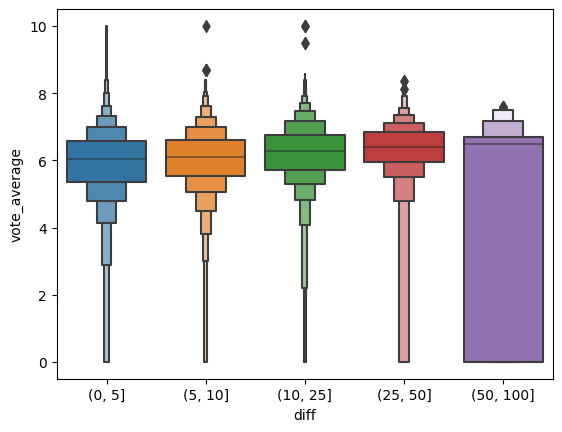

In [22]:
# Média de votos por categoria de diferença
diff_categorized = pd.cut(df['diff'], bins = [0, 5, 10, 25, 50, 100])

sns.boxenplot(x=diff_categorized, y=df['vote_average'])
print(df['vote_average'].groupby(diff_categorized).describe())
plt.show()

<Axes: xlabel='release_year', ylabel='vote_average'>

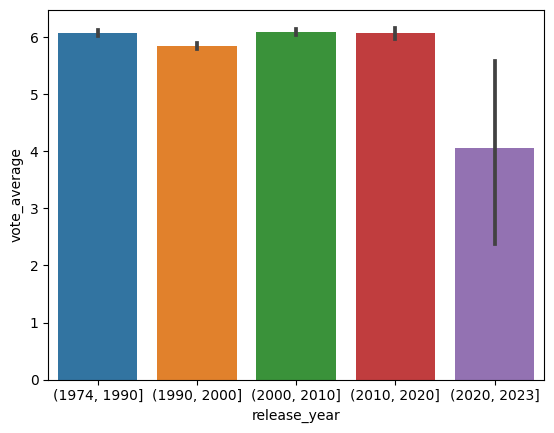

In [27]:
year_categorized = pd.cut(df['release_year'], bins = [1974, 1990, 2000, 2010, 2020, 2023])

sns.barplot(x=year_categorized, y=df['vote_average'])

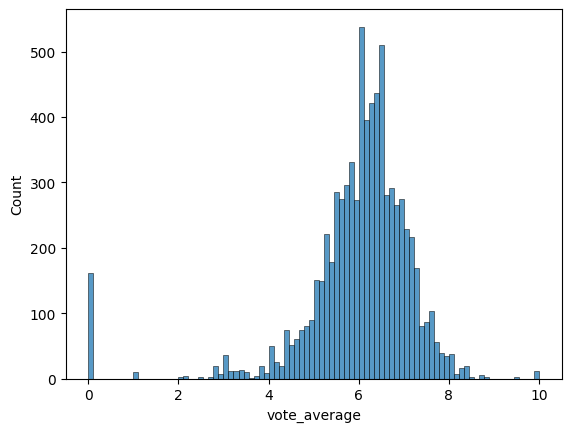

In [24]:
sns.histplot(df['vote_average'])
plt.show()


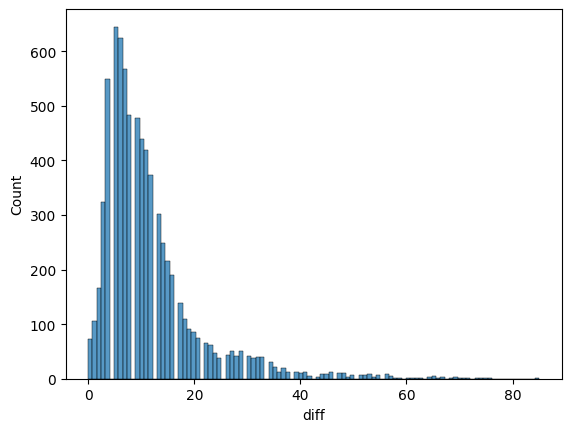

In [23]:
sns.histplot(df['diff'])
plt.show()

In [24]:
df['diff'].describe()

count    7543.000000
mean       11.565557
std         9.640552
min         0.000000
25%         6.000000
50%         9.000000
75%        14.000000
max        85.000000
Name: diff, dtype: float64

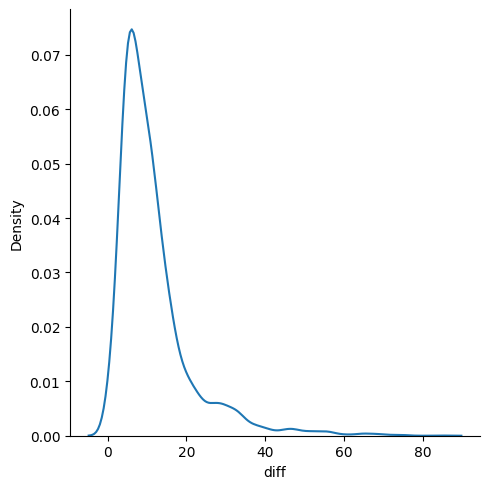

In [25]:
sns.displot(data = df, x = 'diff', kind = 'kde')
plt.show()

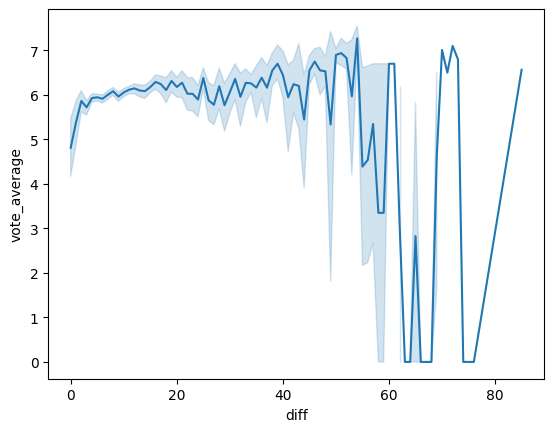

In [26]:
sns.lineplot(data = df, x = 'diff', y = 'vote_average')
plt.show()

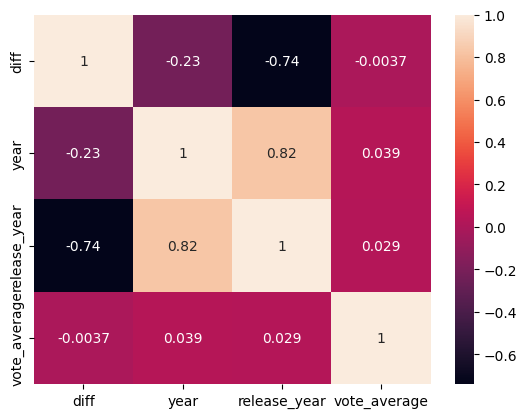

In [27]:
sns.heatmap(df[['diff', 'year', 'release_year', 'vote_average']].corr(), annot=True)
plt.show()

/home/erlo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


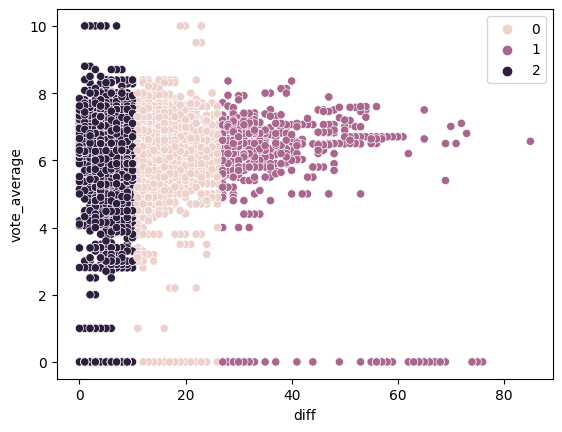

In [31]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['diff', 'vote_average']])
sns.scatterplot(x = 'diff', y = 'vote_average', data=df, hue = kmeans.labels_)
plt.show()

In [1]:
df_group = df[['diff', 'vote_average']]

inertias = []
for i in range(1,11):
	kmeans = KMeans(n_clusters=i)
	kmeans.fit(df_group)
	inertias.append(kmeans.inertia_)


inertias

sns.lineplot(x= range(1,11), y = inertias)

NameError: name 'df' is not defined

/home/erlo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


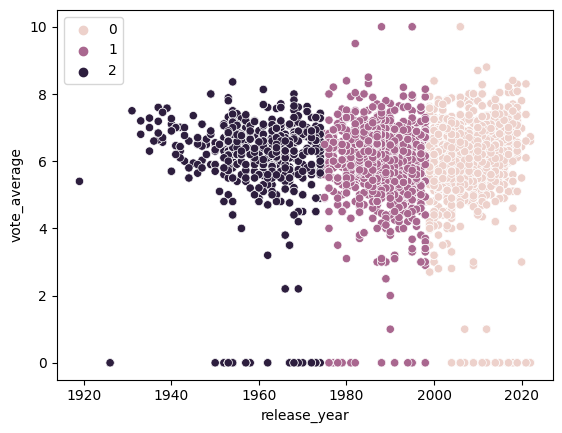

In [32]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['release_year', 'vote_average']])
sns.scatterplot(x = 'release_year', y = 'vote_average', data=df, hue = kmeans.labels_)
plt.show()

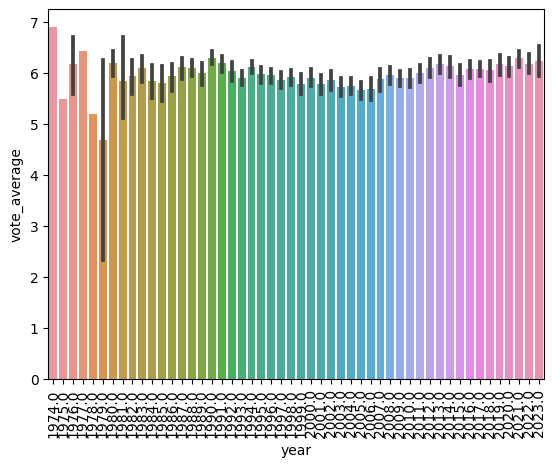

In [33]:
sns.barplot(x = 'year', y = 'vote_average', data=df)
plt.xticks(rotation=90)
plt.show()